 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv, index_col ="Date", infer_datetime_format = True, parse_dates=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col ="Date", infer_datetime_format = True, parse_dates=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [6]:
# Count nulls

algo_df['Algo 1'] = algo_df['Algo 1'].astype(float)
algo_df['Algo 2'] = algo_df['Algo 2'].astype(float)
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col ="Date", infer_datetime_format = True, parse_dates=True)

In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
#remove "$" from the close string and then converting it to a float
sp500_df.Close = [x.strip('$') for x in sp500_df.Close]
sp500_df['Close'] = pd.to_numeric(sp500_df['Close'],errors='ignore', downcast=None)
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()

In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [13]:
# Rename Column
sp500_daily_returns.columns = ["Daily_Return_SP500"]

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame

combined_df = pd.concat([whale_df,algo_df,sp500_daily_returns], axis="columns",join='inner')
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Return_SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

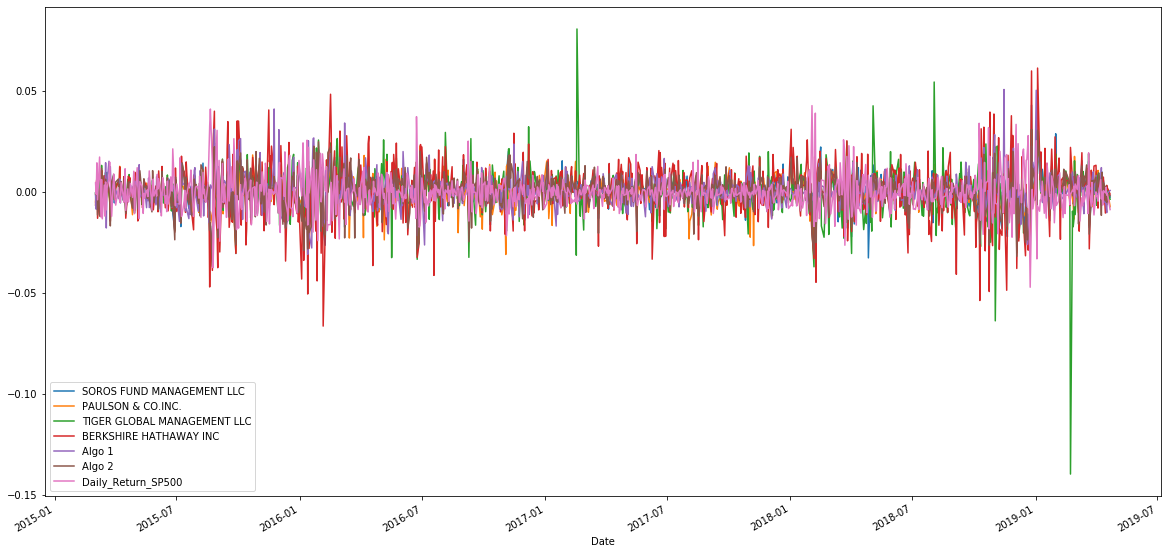

In [15]:
# Plot daily returns
combined_df.plot(figsize = (20,10))

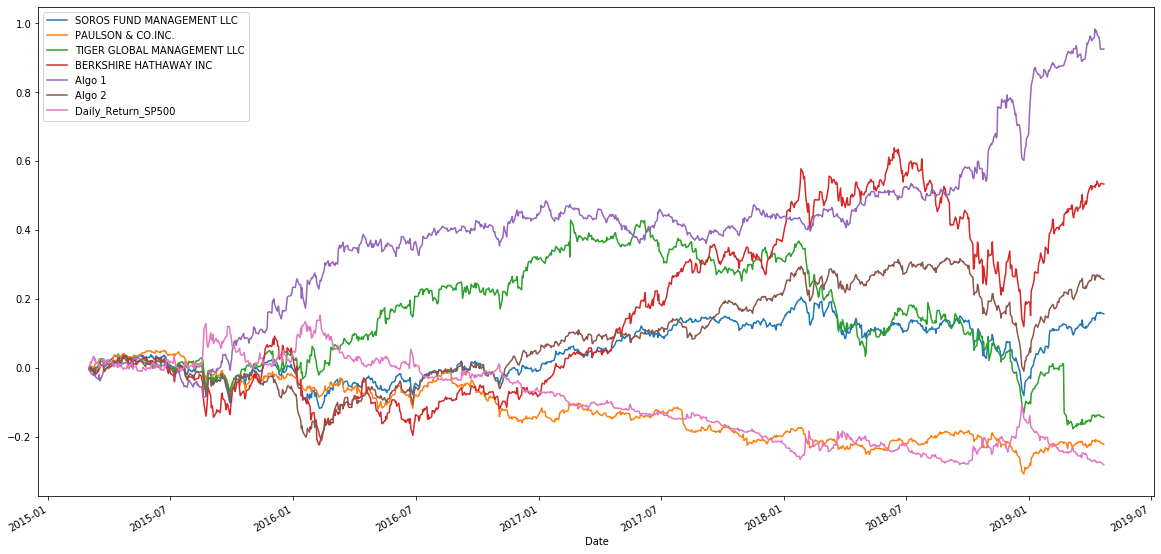

In [16]:
# Plot cumulative returns
cumulative_returns = (combined_df + 1).cumprod() -1
cumulative_returns.plot(figsize = (20,10))

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

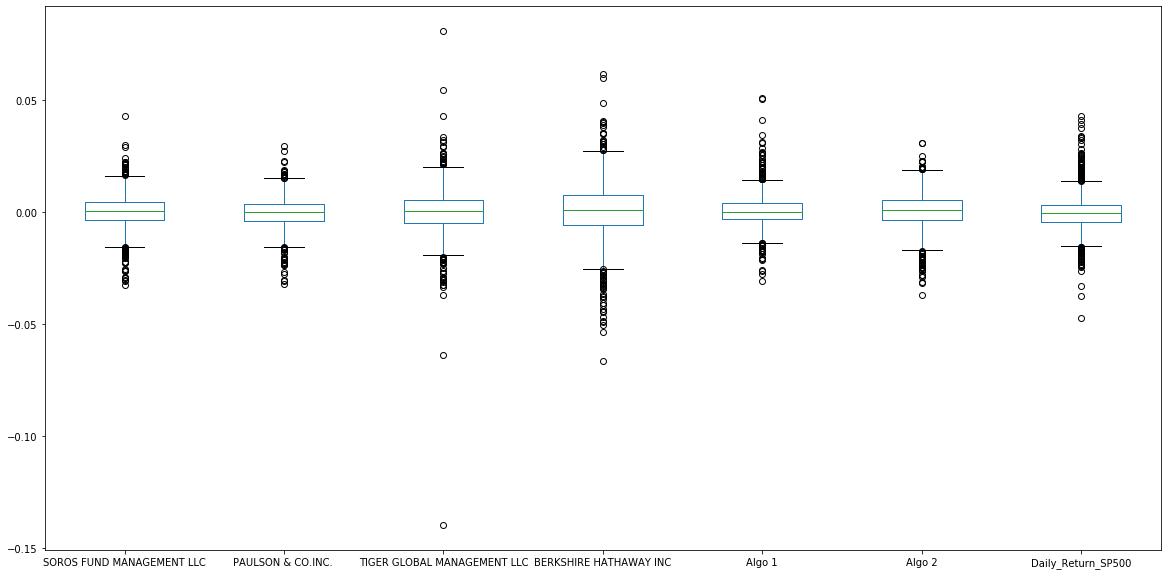

In [17]:
# Box plot to visually show risk

combined_df.plot.box(figsize = (20,10))

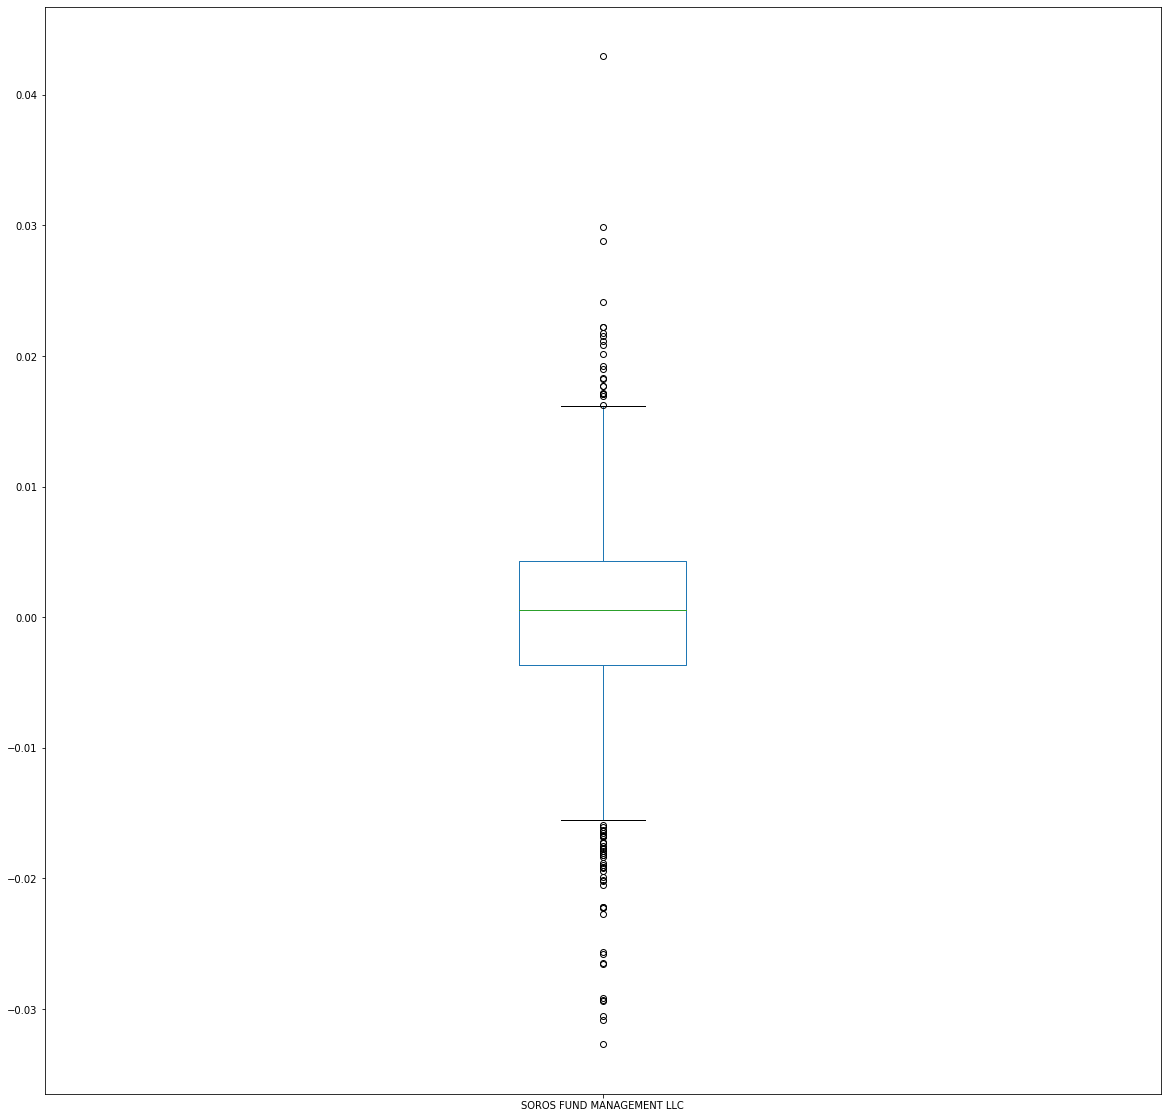

In [18]:
#use iloc method to slice the data frame by column and plot the daily returns

combined_df.iloc[:,0].plot(kind="box", figsize = (20,20))


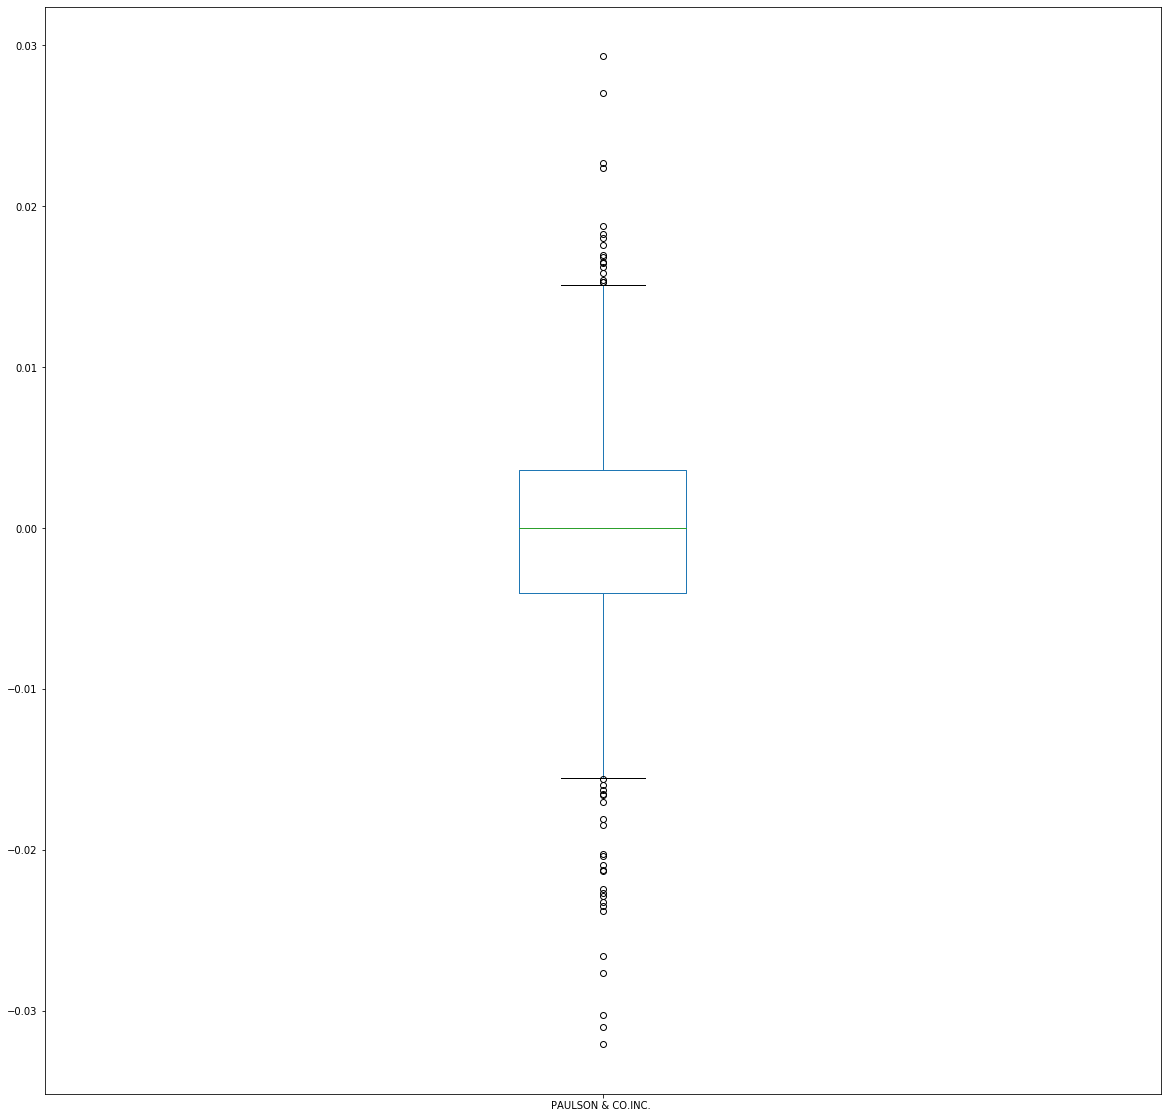

In [19]:
combined_df.iloc[:,1].plot(kind="box", figsize = (20,20))

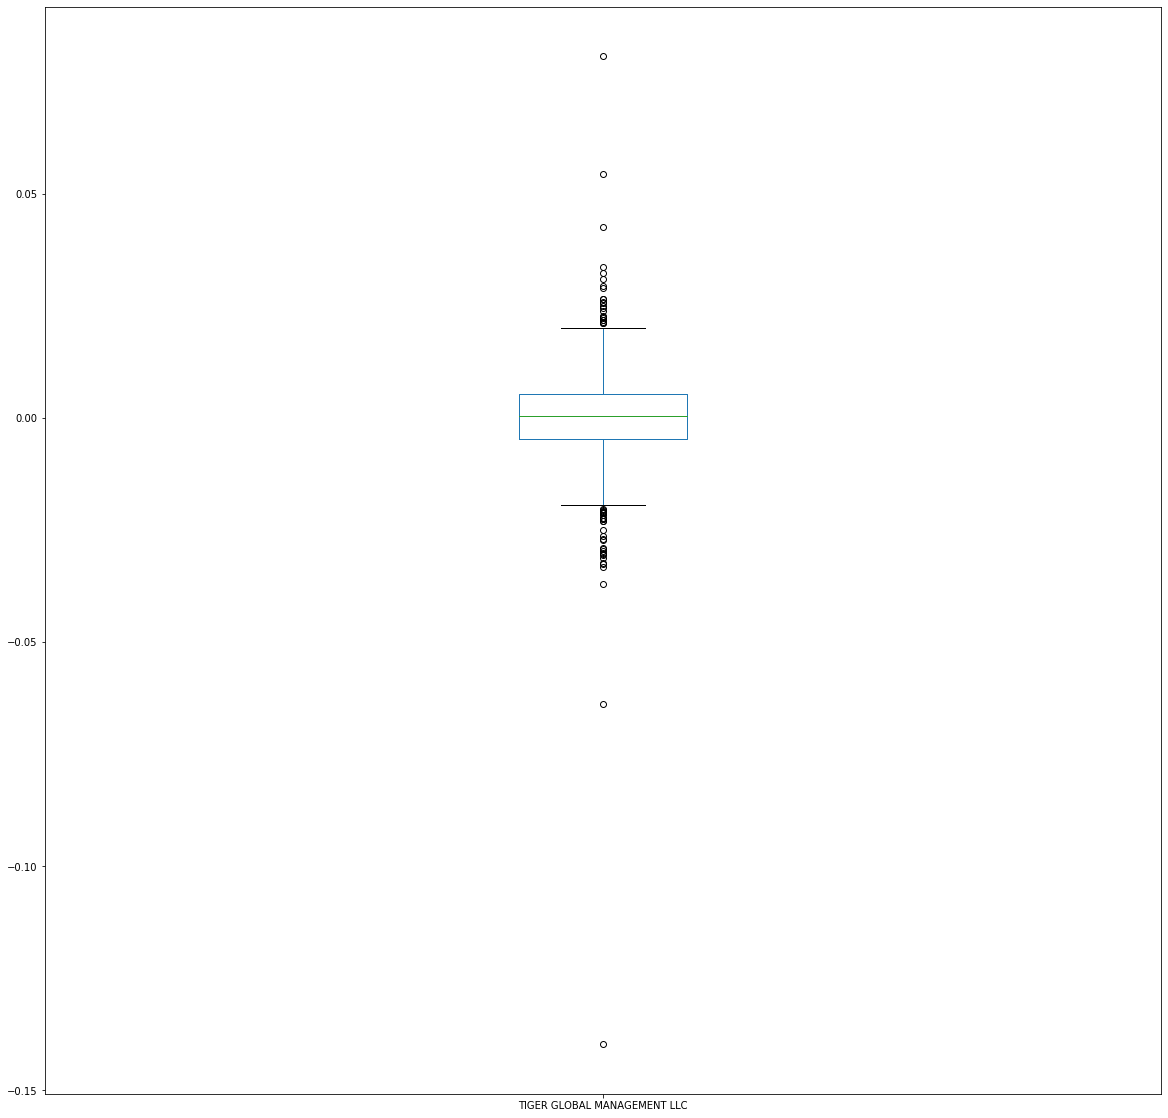

In [20]:
combined_df.iloc[:,2].plot(kind="box", figsize = (20,20))

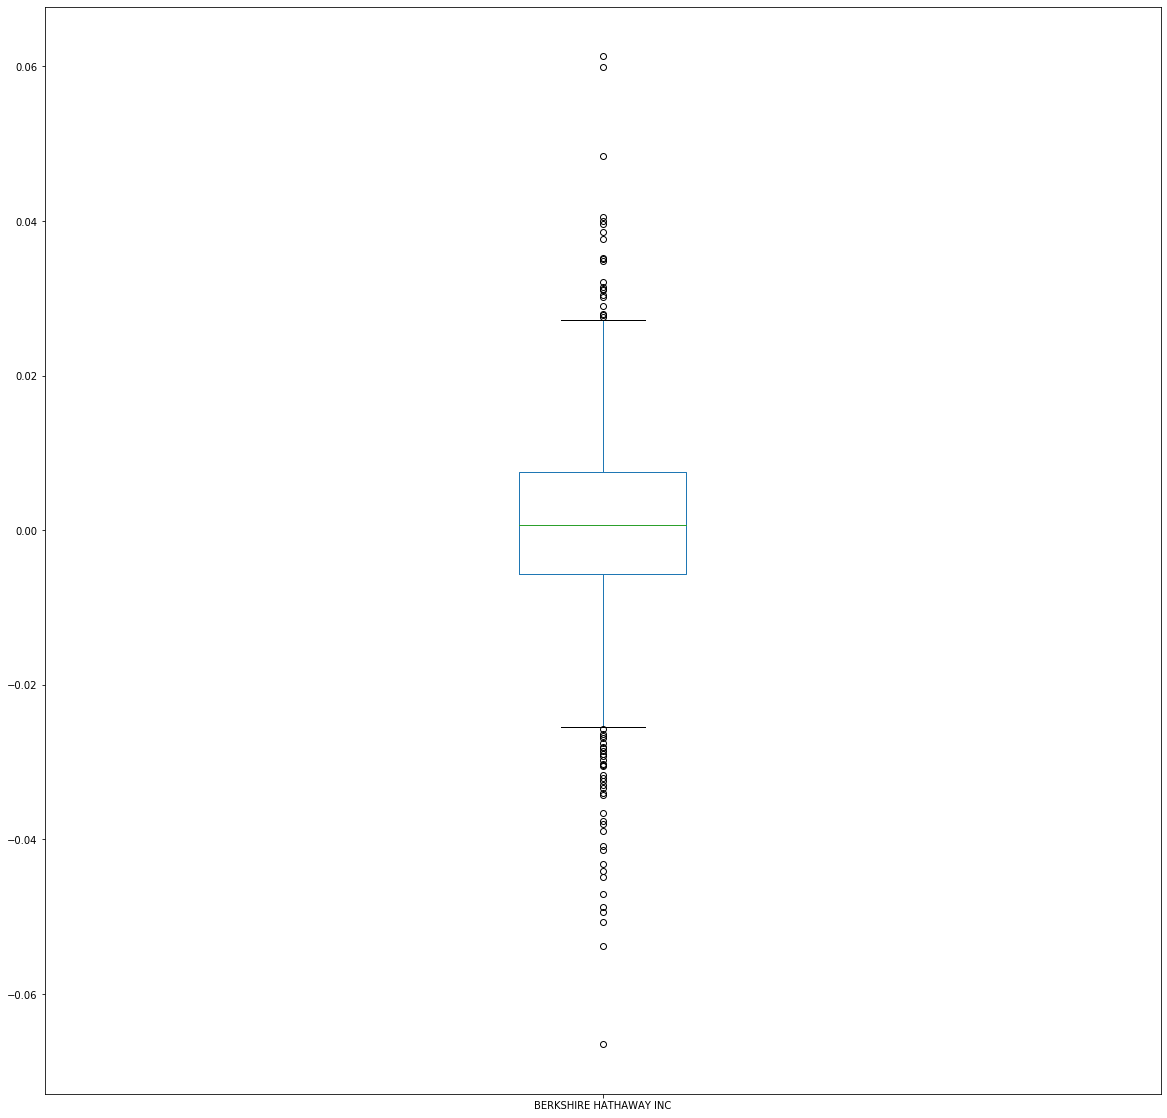

In [21]:
combined_df.iloc[:,3].plot(kind="box", figsize = (20,20))

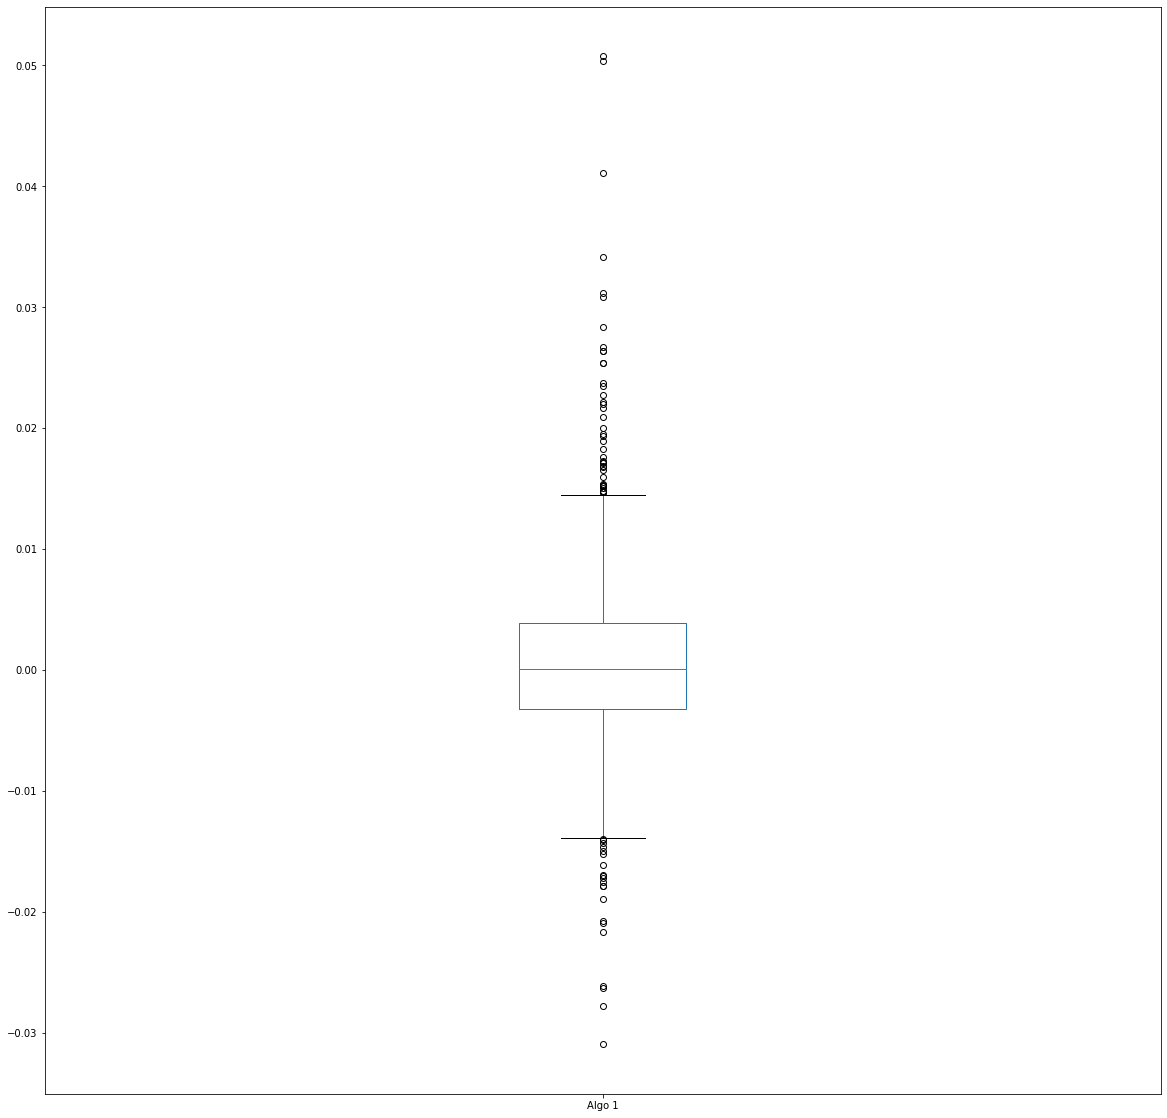

In [22]:
combined_df.iloc[:,4].plot(kind="box", figsize = (20,20))

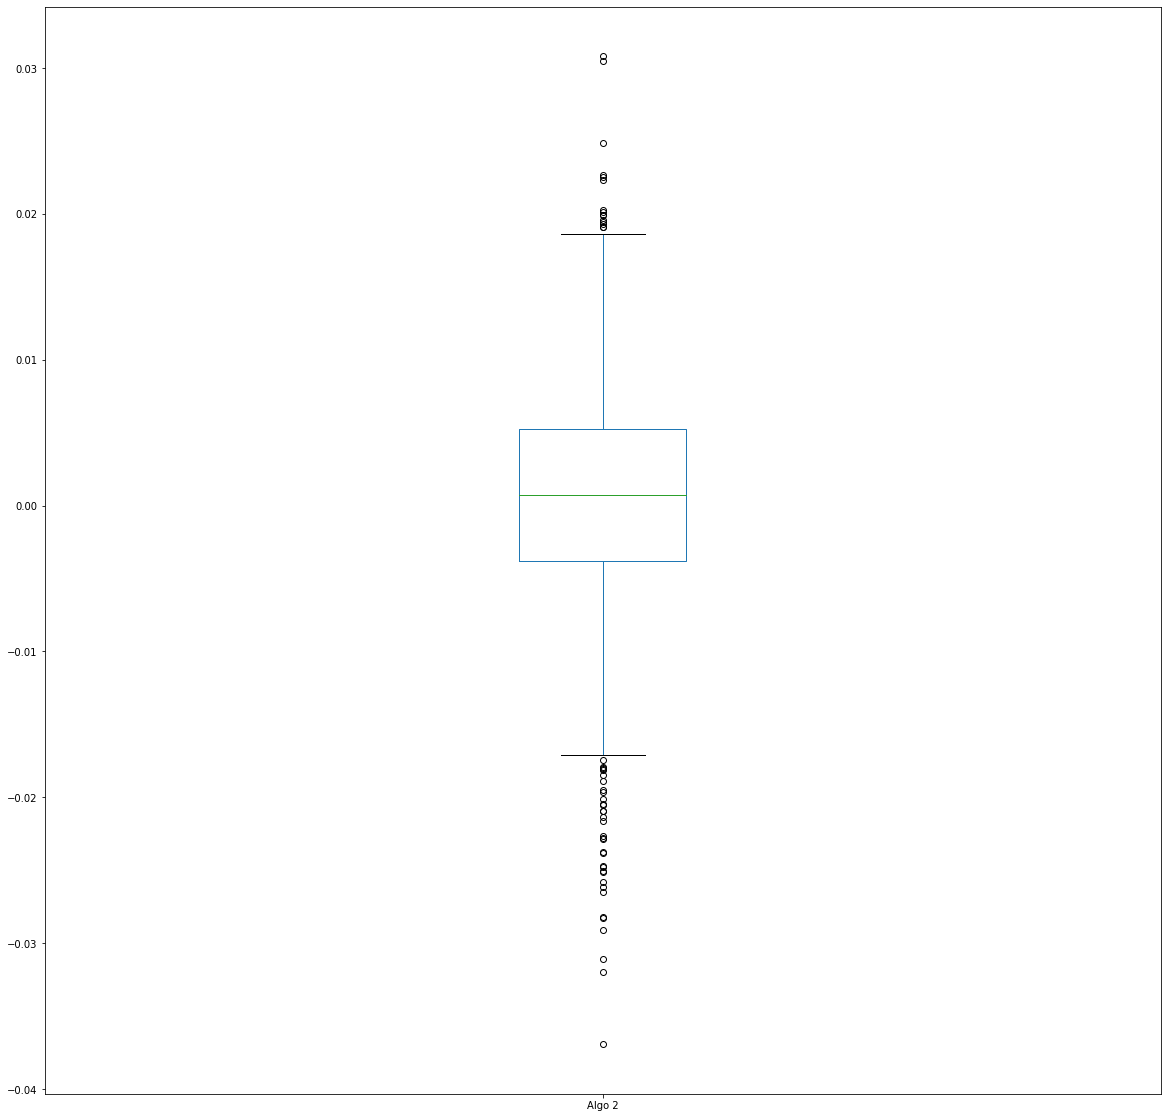

In [23]:
combined_df.iloc[:,5].plot(kind="box", figsize = (20,20))

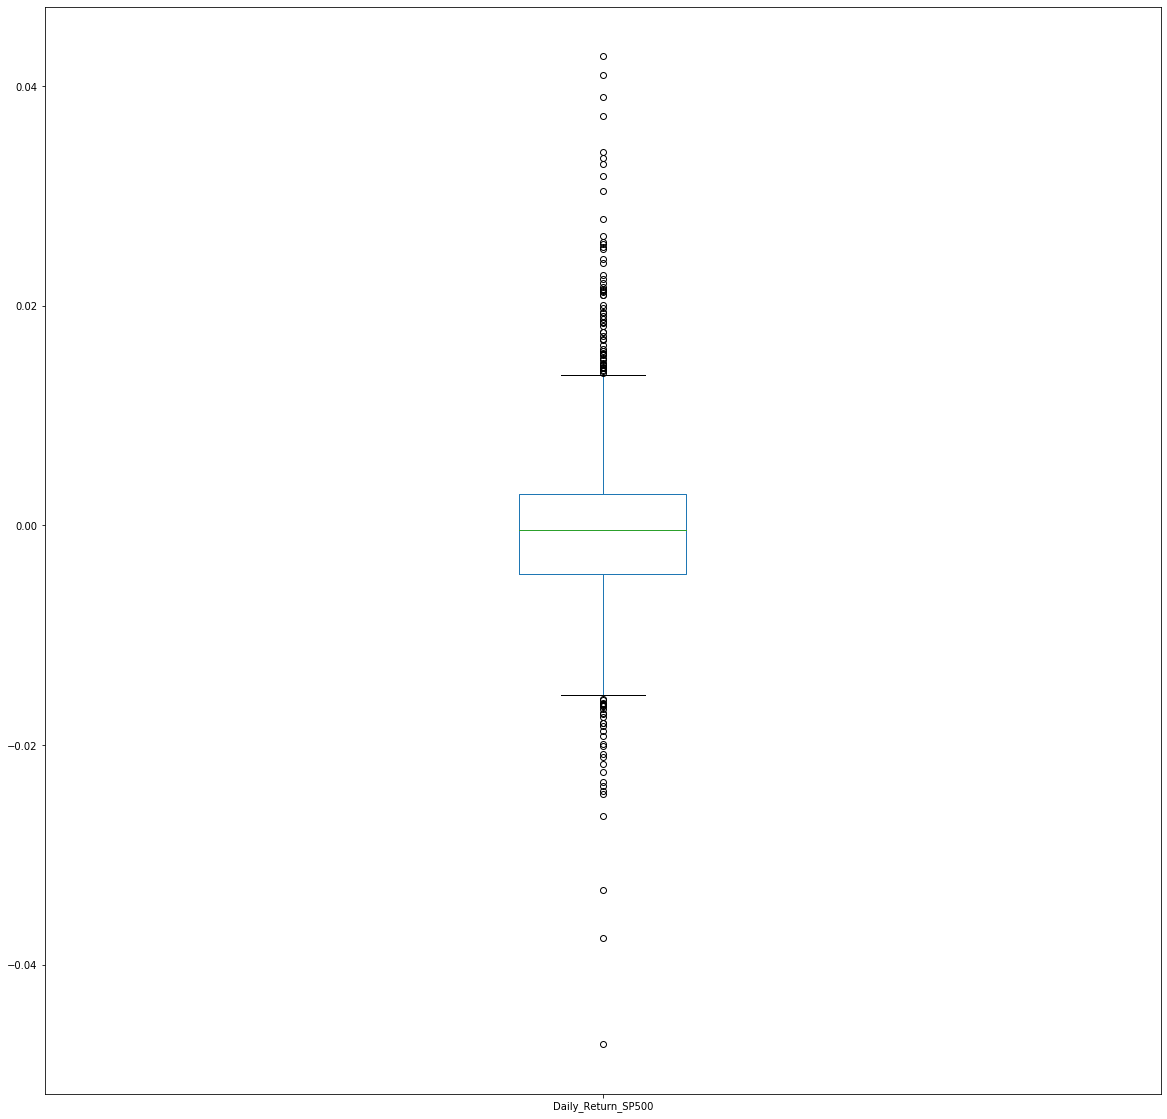

In [24]:
combined_df.iloc[:,6].plot(kind="box", figsize = (20,20))

In [25]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

st_devs = combined_df.std()

st_devs

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
Daily_Return_SP500             0.008587
dtype: float64

In [27]:
# Determine which portfolios are riskier than the S&P 500

if st_devs[0] > st_devs["Daily_Return_SP500"]:
    print("SOROS FUND MANAGEMENT LLC is riskier than S&P500")
if st_devs[1] > st_devs["Daily_Return_SP500"]:
    print("PAULSON & CO.INC. is riskier than S&P500")
if st_devs[2] > st_devs["Daily_Return_SP500"]:
    print("TIGER GLOBAL MANAGEMENT LLC is riskier than S&P500")
if st_devs[3] > st_devs["Daily_Return_SP500"]:
    print("BERKSHIRE HATHAWAY INC is riskier than S&P500")
if st_devs[4] > st_devs["Daily_Return_SP500"]:
    print("Algo 1 is riskier than S&P500")
if st_devs[5] > st_devs["Daily_Return_SP500"]:
    print("Algo 2 is riskier than S&P500")



TIGER GLOBAL MANAGEMENT LLC is riskier than S&P500
BERKSHIRE HATHAWAY INC is riskier than S&P500


In [81]:
#another way for the check using pandas

stdevs_df = pd.DataFrame( st_devs, columns = ['st_deviation'] )
SP500_std= st_devs["Daily_Return_SP500"]
stdevs_df = stdevs_df[ stdevs_df['st_deviation'] > SP500_std]

print(f"The following portfolios are riskier than S&P500: {stdevs_df.index.values}")

The following portfolios are riskier than S&P500: ['TIGER GLOBAL MANAGEMENT LLC' 'BERKSHIRE HATHAWAY INC']


In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualized_st_dev = combined_df.std() * np.sqrt(252)
annualized_st_dev

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
Daily_Return_SP500             0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

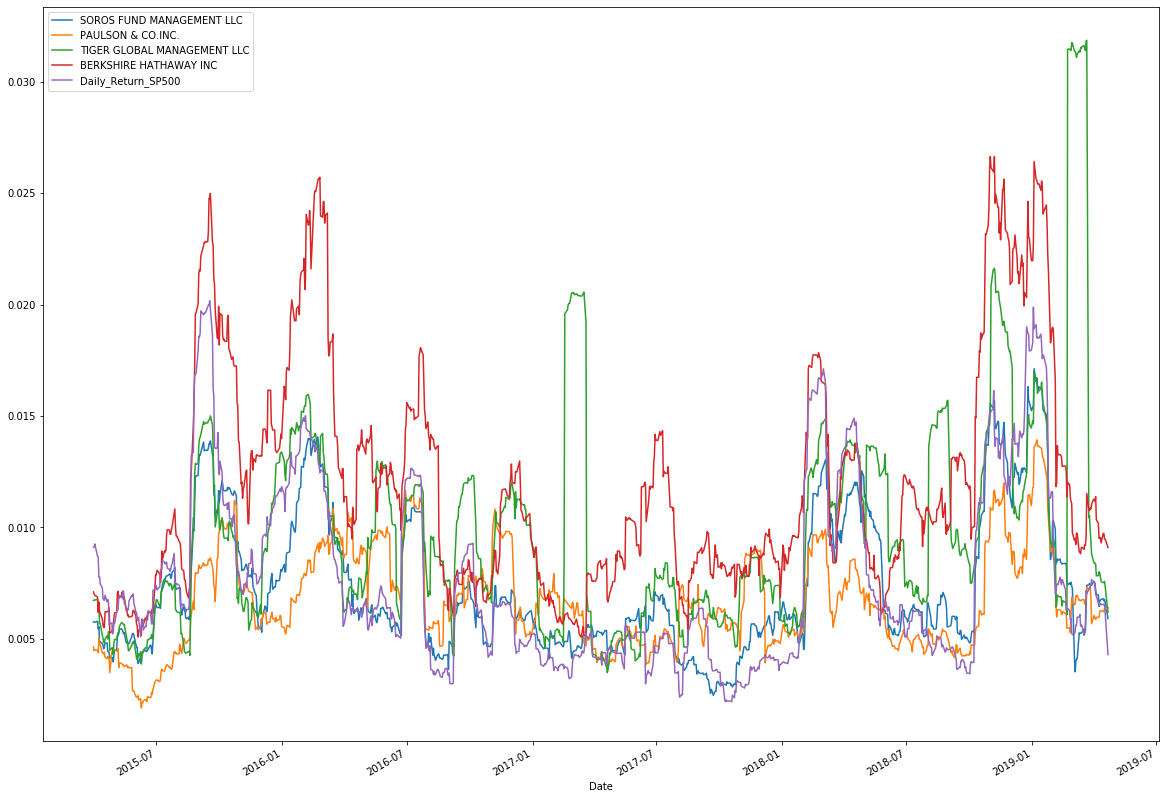

In [29]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window

combined_df[["SOROS FUND MANAGEMENT LLC", 'PAULSON & CO.INC. ',"TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC", "Daily_Return_SP500"]].rolling(window=21).std().plot(figsize=(20,15))


In [30]:
# Construct a correlation table
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Return_SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
Daily_Return_SP500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


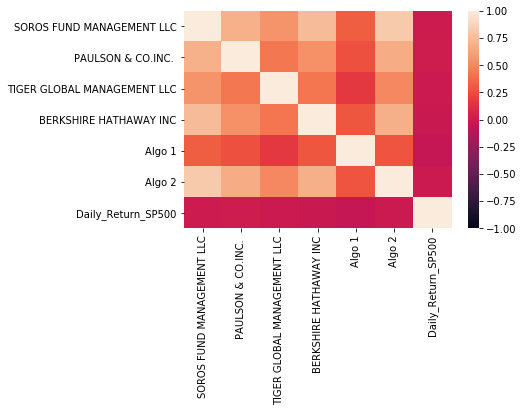

In [31]:
sns.heatmap(correlation,vmin=-1, vmax=1)

In [40]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

#calculate covariance
covariance_Algo1 = combined_df["Algo 1"].cov(combined_df["Daily_Return_SP500"])
covariance_Algo1

-2.2230425517155273e-06

In [41]:
#calculate the variance Algo 1

variance_Algo1 = combined_df["Algo 1"].var()
variance_Algo1

5.8105415868188166e-05

In [43]:
#calculate the beta for Algo1

Algo1_beta = covariance_Algo1 / variance_Algo1
Algo1_beta

-0.03825878394465824

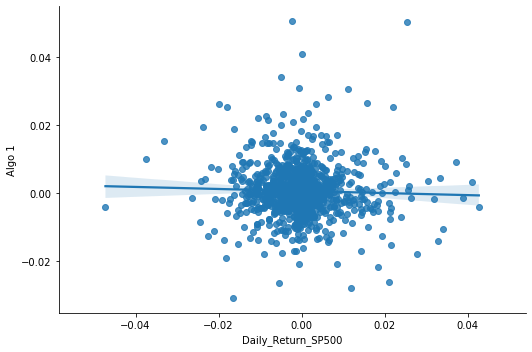

In [39]:
sns.lmplot(x='Daily_Return_SP500', y='Algo 1', data=combined_df, aspect=1.5, fit_reg=True)

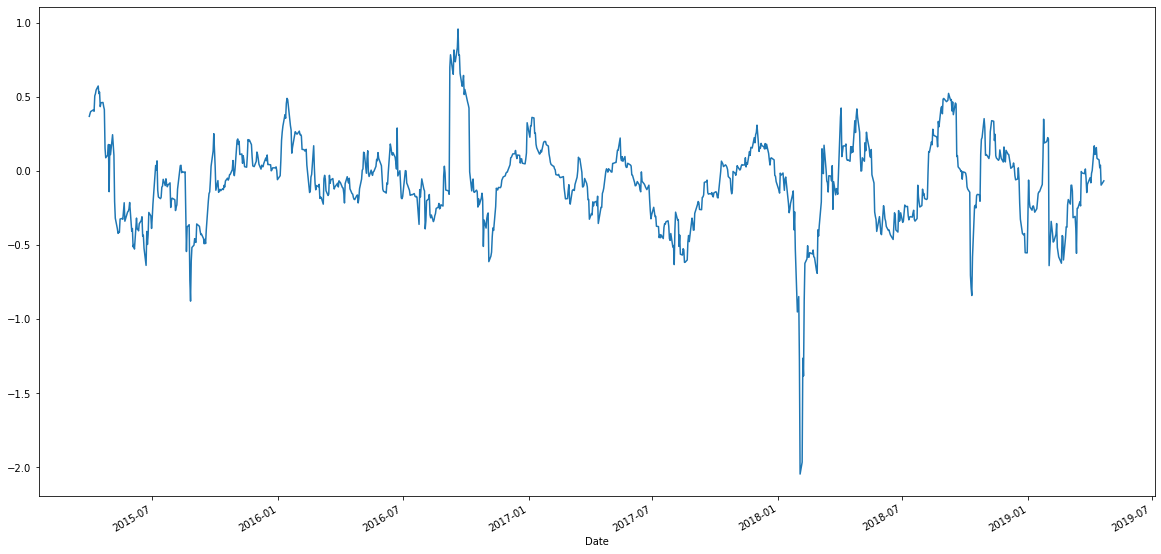

In [35]:
#calculate rolling covariance
rolling_covariance_Algo1 = combined_df["Algo 1"].rolling(window=21).cov(combined_df["Daily_Return_SP500"])
rolling_covariance_Algo1

#calculate the rolling variance Algo 1

rolling_variance_Algo1 = combined_df["Algo 1"].rolling(window=21).var()
rolling_variance_Algo1

#calucate rolling beta for Algo 1 
rolling_Algo1_beta = rolling_covariance_Algo1 / rolling_variance_Algo1
rolling_Algo1_beta.plot(figsize=(20,10))

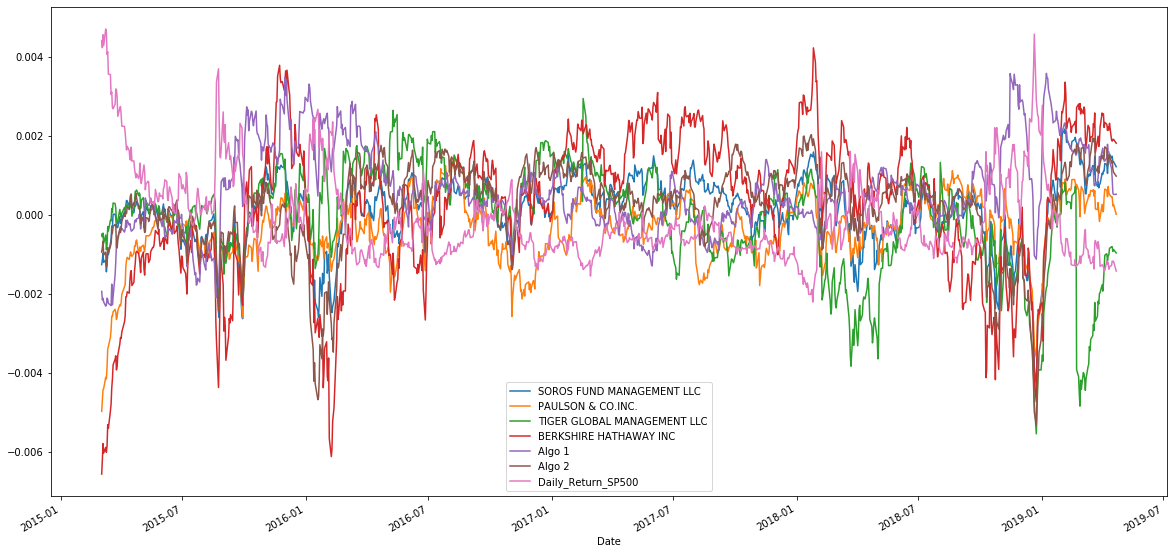

In [36]:
# Calculate a rolling window using the exponentially weighted moving average. 

combined_df.ewm(halflife=21,adjust=False).mean().plot(figsize = (20,10))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [37]:
# Calculate annualized Sharpe Ratios
sharpe_ratios_df = (combined_df.mean() * 252) / (annualized_st_dev)

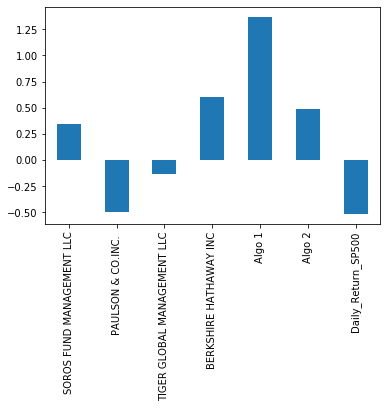

In [38]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_df.plot(kind="bar")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [44]:
# Read the first stock

FB_returns_csv = Path("Resources/FB - sheet1.csv")
FB_df = pd.read_csv(FB_returns_csv, index_col ="Date", infer_datetime_format = True, parse_dates=True)
FB_df.head()

,Close
Date,
2015-03-03 16:00:00,79.60
2015-03-04 16:00:00,80.90
2015-03-05 16:00:00,81.21
2015-03-06 16:00:00,80.01
2015-03-09 16:00:00,79.44


In [45]:
# Read the second stock
TSLA_returns_csv = Path("Resources/TSLA - sheet1.csv")
TSLA_df = pd.read_csv(TSLA_returns_csv, index_col ="Date", infer_datetime_format = True, parse_dates=True)

TSLA_df.head()

,Close
Date,
2015-03-03 16:00:00,199.56
2015-03-04 16:00:00,202.44
2015-03-05 16:00:00,200.63
2015-03-06 16:00:00,193.88
2015-03-09 16:00:00,190.88


In [46]:
# Read the third stock
EMF_returns_csv = Path("Resources/EMF - sheet1.csv")
EMF_df = pd.read_csv(EMF_returns_csv, index_col ="Date", infer_datetime_format = True, parse_dates=True)

EMF_df.head()

,Close
Date,
2015-03-03 16:00:00,15.79
2015-03-04 16:00:00,15.71
2015-03-05 16:00:00,15.70
2015-03-06 16:00:00,15.46
2015-03-09 16:00:00,15.35


In [47]:
# Read the forth stock
GTLS_returns_csv = Path("Resources/GTLS - sheet1.csv")
GTLS_df = pd.read_csv(GTLS_returns_csv, index_col ="Date", infer_datetime_format = True, parse_dates=True)

GTLS_df.head()

,Close
Date,
2015-03-03 16:00:00,37.23
2015-03-04 16:00:00,35.88
2015-03-05 16:00:00,36.63
2015-03-06 16:00:00,35.47
2015-03-09 16:00:00,34.49


In [48]:
# Concatenate all stocks into a single DataFrame
portfolio_df = pd.concat([GTLS_df, FB_df, TSLA_df, EMF_df], axis = "columns", join="inner")
portfolio_df.columns = ["GTLS", "FB", "TSLA", "EMF"]
portfolio_df

,GTLS,FB,TSLA,EMF
Date,,,,
2015-03-03 16:00:00,37.23,79.60,199.56,15.79
2015-03-04 16:00:00,35.88,80.90,202.44,15.71
2015-03-05 16:00:00,36.63,81.21,200.63,15.70
2015-03-06 16:00:00,35.47,80.01,193.88,15.46
2015-03-09 16:00:00,34.49,79.44,190.88,15.35
...,...,...,...,...
2019-04-12 16:00:00,88.42,179.10,267.70,15.37
2019-04-15 16:00:00,87.07,179.65,266.38,15.36
2019-04-16 16:00:00,86.93,178.87,273.36,15.45


In [49]:
# Reset the index
# YOUR CODE HERE

In [50]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [51]:
# Drop Nulls
portfolio_df.dropna(inplace=True)
portfolio_df

,GTLS,FB,TSLA,EMF
Date,,,,
2015-03-03 16:00:00,37.23,79.60,199.56,15.79
2015-03-04 16:00:00,35.88,80.90,202.44,15.71
2015-03-05 16:00:00,36.63,81.21,200.63,15.70
2015-03-06 16:00:00,35.47,80.01,193.88,15.46
2015-03-09 16:00:00,34.49,79.44,190.88,15.35
...,...,...,...,...
2019-04-12 16:00:00,88.42,179.10,267.70,15.37
2019-04-15 16:00:00,87.07,179.65,266.38,15.36
2019-04-16 16:00:00,86.93,178.87,273.36,15.45


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [52]:
# Calculate weighted portfolio returns
weights = [1/4, 1/4, 1/4, 1/4]
# YOUR CODE HERE

daily_returns = portfolio_df.pct_change()

portfolio_returns = daily_returns.dot(weights)

portfolio_returns.rename("My_portfolio", inplace=True)
portfolio_returns.index = portfolio_returns.index.normalize()

portfolio_returns.head()


Date
2015-03-03         NaN
2015-03-04   -0.002641
2015-03-05    0.003789
2015-03-06   -0.023844
2015-03-09   -0.014335
Name: My_portfolio, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
combined_df = combined_df.merge(portfolio_returns, how ="inner", left_index = True, right_on = "Date")
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Return_SP500,My_portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002641
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.003789
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.023844
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,-0.014335
...,...,...,...,...,...,...,...,...
2019-04-12,0.005663,-0.001165,0.004217,0.007316,-0.005501,0.004504,0.000630,0.000907
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.004445
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.006528


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

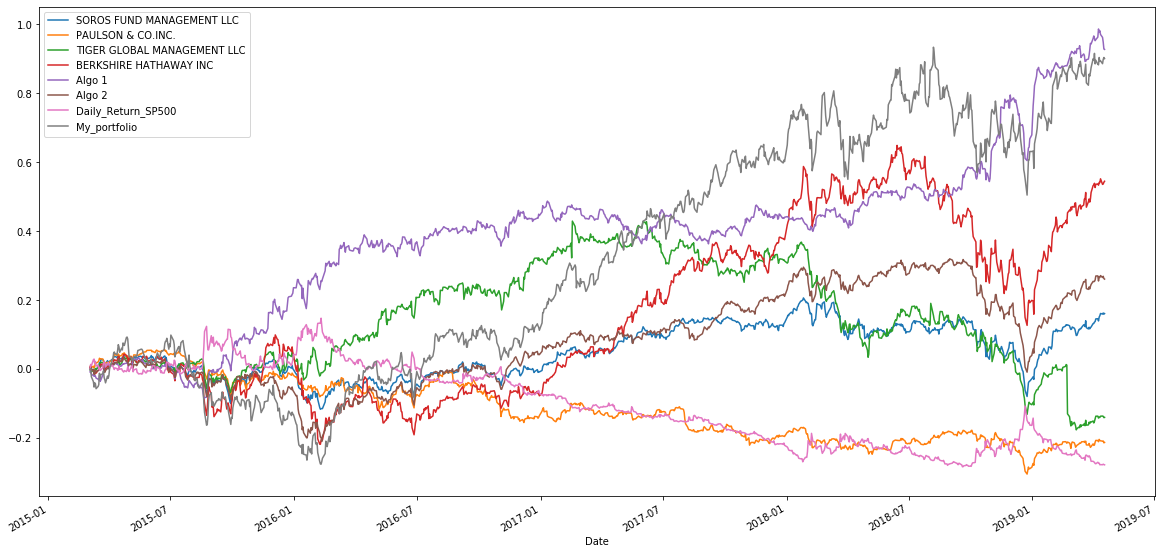

In [55]:
#Portfolioperformance
cumulative_returns_updated = (combined_df + 1).cumprod() -1
cumulative_returns_updated.plot(figsize = (20,10))

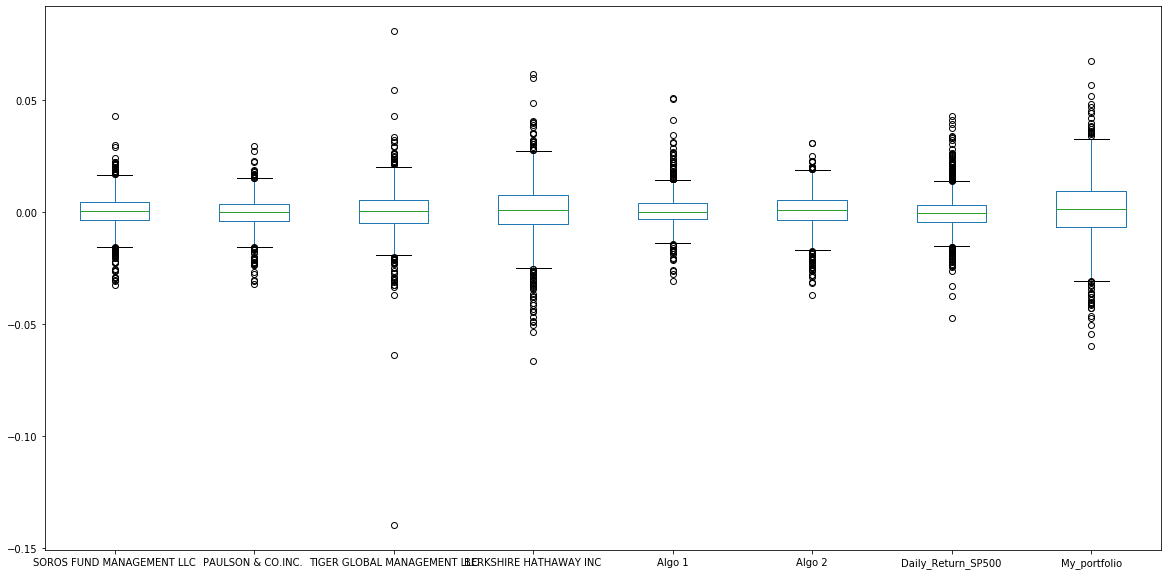

In [61]:
# Risk
combined_df.plot.box(figsize =(20,10))

In [63]:
#annualized standard deviation of the portfolios
annualized_st_dev_new = combined_df.std() * np.sqrt(252)
annualized_st_dev_new

SOROS FUND MANAGEMENT LLC      0.125459
PAULSON & CO.INC.              0.111554
TIGER GLOBAL MANAGEMENT LLC    0.173147
BERKSHIRE HATHAWAY INC         0.205245
Algo 1                         0.121116
Algo 2                         0.132535
Daily_Return_SP500             0.136360
My_portfolio                   0.229663
dtype: float64

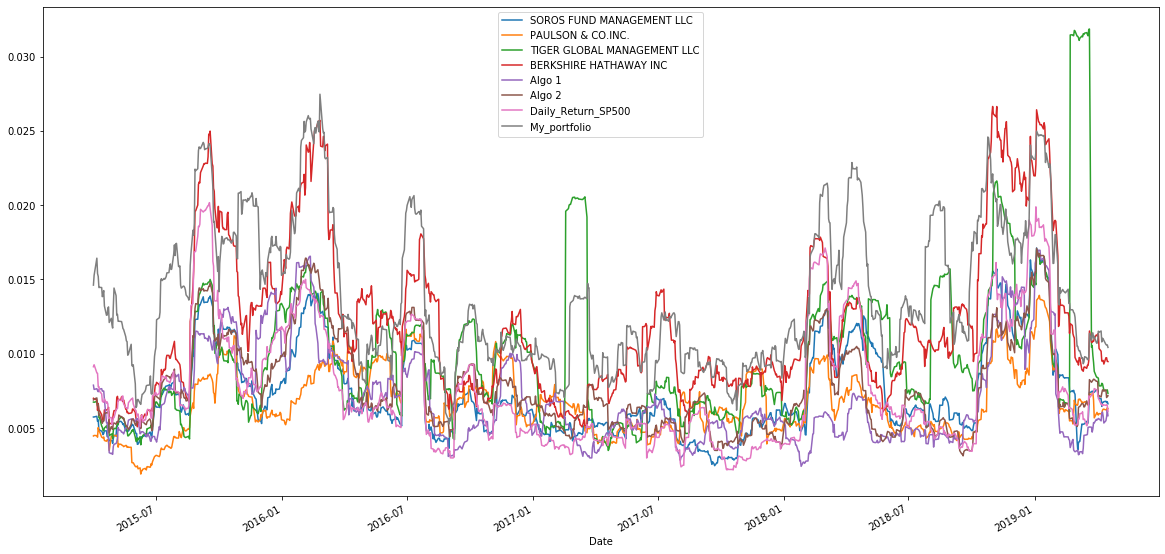

In [65]:
# Rolling standard deviation with 21 day window

combined_df.rolling(window=21).std().plot(figsize = (20,10))

In [67]:
# Annualized Sharpe Ratios
sharpe_ratios_df_new = (combined_df.mean() * 252) / (annualized_st_dev_new)
sharpe_ratios_df_new

SOROS FUND MANAGEMENT LLC      0.350687
PAULSON & CO.INC.             -0.465501
TIGER GLOBAL MANAGEMENT LLC   -0.124530
BERKSHIRE HATHAWAY INC         0.616456
Algo 1                         1.373513
Algo 2                         0.490095
Daily_Return_SP500            -0.511658
My_portfolio                   0.792678
dtype: float64

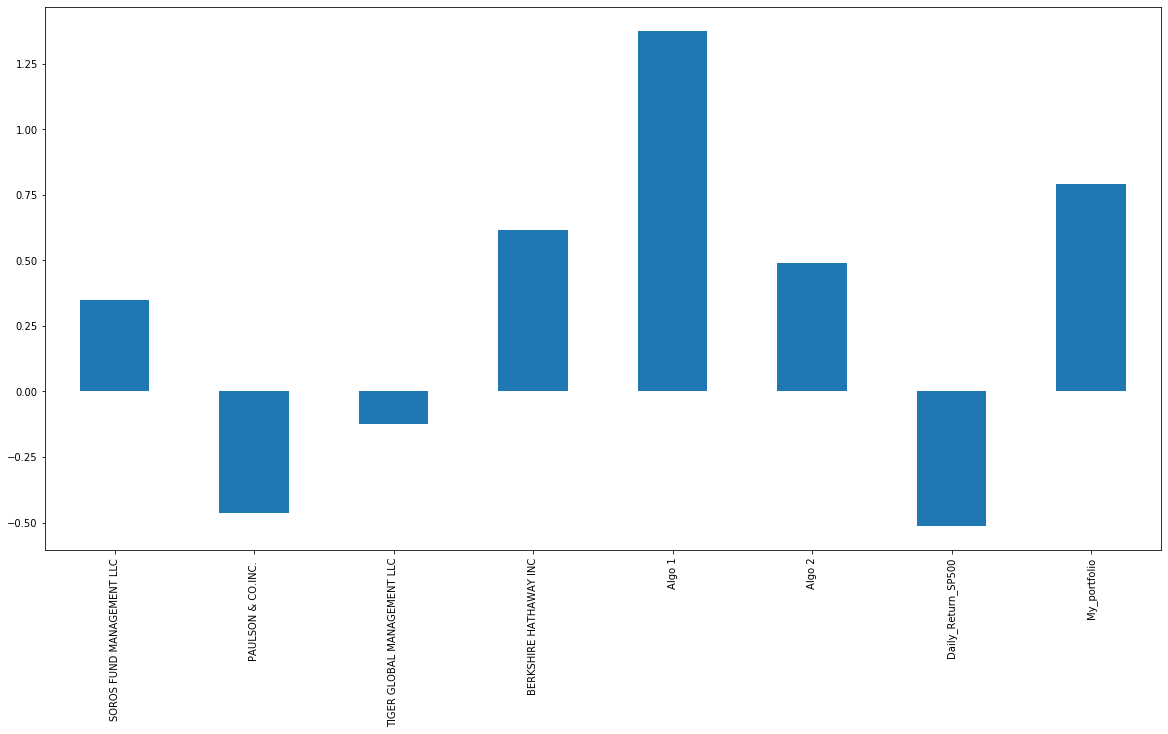

In [68]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_df_new.plot(kind="bar", figsize=(20,10))

In [69]:
# Create a correlation analysis
correlation_new = combined_df.corr()
correlation_new

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily_Return_SP500,My_portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699916,0.560995,0.754190,0.320884,0.826713,0.000338,0.675682
PAULSON & CO.INC.,0.699916,1.000000,0.434299,0.545448,0.268618,0.678249,0.012960,0.509192
TIGER GLOBAL MANAGEMENT LLC,0.560995,0.434299,1.000000,0.424152,0.164120,0.507121,-0.001796,0.407237
BERKSHIRE HATHAWAY INC,0.754190,0.545448,0.424152,1.000000,0.291560,0.687782,-0.013697,0.651388
Algo 1,0.320884,0.268618,0.164120,0.291560,1.000000,0.287833,-0.033804,0.314823
Algo 2,0.826713,0.678249,0.507121,0.687782,0.287833,1.000000,-0.002367,0.701640
Daily_Return_SP500,0.000338,0.012960,-0.001796,-0.013697,-0.033804,-0.002367,1.000000,0.004461
My_portfolio,0.675682,0.509192,0.407237,0.651388,0.314823,0.701640,0.004461,1.000000


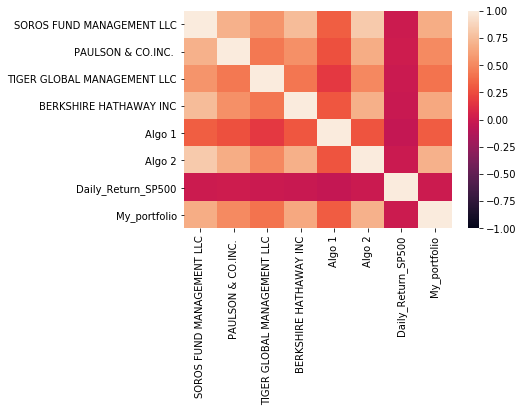

In [70]:
sns.heatmap(correlation_new,vmin=-1, vmax=1)

In [83]:
# Betacompared to the Soros portfolio

covariance_MP = combined_df["My_portfolio"].cov(combined_df["SOROS FUND MANAGEMENT LLC"])
variance_MP  = combined_df["My_portfolio"].var()

My_portfolio_beta = covariance_MP / variance_MP
My_portfolio_beta

0.36910797476872675

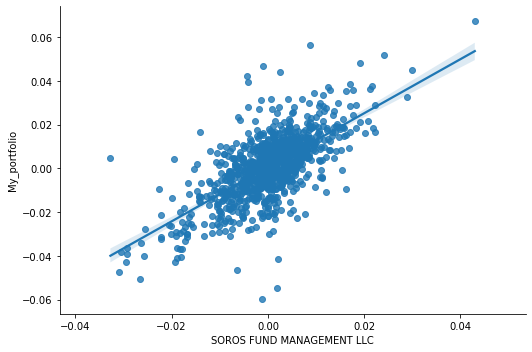

In [84]:
sns.lmplot(x='SOROS FUND MANAGEMENT LLC', y='My_portfolio', data=combined_df, aspect=1.5, fit_reg=True)